<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-3/blob/main/notebooks/Q2_2_AIML425_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=68f2c3a25abc1326939d00bf86925081459ba952ddb234cb18db26f51fd1df3a
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [ ]:
# !pip install --upgrade networkx

In [2]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from scipy.sparse import csr_matrix
import numpy as np

In [3]:
def sensor_score(tiger_passed_by, c):
    s = random.uniform(0, 1)  # Random float between 0 and 1

    if tiger_passed_by:
        return s
    else:
        if s < c:
            return 2 * s / c
        else:
            return 2 * (1 - s) / (1 - c)


In [6]:
# Failure rate
F = 0.1  # For example, 10% failure rate

# Constant c
c = 1e-9

In [35]:
# Grid dimensions
n = 32  # 32x32 grid
N = n * n  # Total number of sensors

# Generate grid with failures and sensor scores
grid = torch.zeros(n, n)
for i in range(n):
    for j in range(n):
        if random.random() < F:
            grid[i, j] = 0  # Sensor failed
        else:
            grid[i, j] = sensor_score(False, c)  # Initialize with sensor_score

# Initialize the tiger's track
edge = random.choice(["top", "bottom", "left", "right"])
if edge == "top":
    x, y = 0, random.randint(0, n-1)
elif edge == "bottom":
    x, y = n-1, random.randint(0, n-1)
elif edge == "left":
    x, y = random.randint(0, n-1), 0
else:  # edge == "right"
    x, y = random.randint(0, n-1), n-1

# Track of the tiger
track = [(x, y)]

# Simulate the tiger's movement
while True:
    dx, dy = random.choice([(-1, -1), (-1, 0), (-1, 1),
                            (0, -1),           (0, 1),
                            (1, -1),  (1, 0),  (1, 1)])
    x, y = x + dx, y + dy

    # Check for exit conditions
    exit_edge = None
    if x < 0:
        exit_edge = "top"
    elif x >= n:
        exit_edge = "bottom"
    elif y < 0:
        exit_edge = "left"
    elif y >= n:
        exit_edge = "right"

    if exit_edge and exit_edge != edge:
        break  # Tiger has left the grid from a different edge

    # If within grid, update the track and grid
    if 0 <= x < n and 0 <= y < n:
        track.append((x, y))

    # # Check for exit conditions
    # if x < 0 or x >= n or y < 0 or y >= n:
    #     break  # Tiger has left the grid

    # # If within grid, update the track
    # track.append((x, y))

# Update grid values for the track
for x, y in track:
    grid[x, y] = sensor_score(True, c)  # Update with sensor_score

# Create adjacency matrix
adj_matrix = torch.zeros(N, N)
for i in range(n):
    for j in range(n):
        if grid[i, j] == 0:  # Skip failed sensors
            continue
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip self-loop
                x, y = i + dx, j + dy
                if 0 <= x < n and 0 <= y < n and grid[x, y] != 0:
                    index1 = i * n + j
                    index2 = x * n + y
                    adj_matrix[index1, index2] = 1

# Convert to PyTorch Geometric Data
edge_index = adj_matrix.nonzero().t().contiguous()
data = Data(edge_index=edge_index)

print(len(track))
track

448


[(7, 31),
 (8, 30),
 (7, 30),
 (7, 29),
 (7, 28),
 (8, 27),
 (9, 27),
 (10, 28),
 (11, 27),
 (12, 26),
 (13, 26),
 (14, 27),
 (15, 28),
 (16, 27),
 (15, 28),
 (14, 28),
 (14, 27),
 (15, 27),
 (15, 26),
 (14, 27),
 (15, 26),
 (15, 25),
 (14, 26),
 (13, 27),
 (13, 26),
 (12, 26),
 (13, 25),
 (12, 26),
 (13, 25),
 (14, 25),
 (15, 24),
 (15, 23),
 (14, 24),
 (13, 23),
 (14, 24),
 (15, 25),
 (15, 24),
 (14, 23),
 (15, 24),
 (15, 25),
 (15, 24),
 (14, 23),
 (14, 22),
 (15, 23),
 (15, 24),
 (14, 23),
 (14, 22),
 (15, 21),
 (16, 20),
 (16, 19),
 (16, 18),
 (17, 18),
 (17, 17),
 (16, 17),
 (16, 18),
 (15, 18),
 (15, 19),
 (14, 19),
 (15, 20),
 (15, 21),
 (16, 22),
 (17, 22),
 (18, 21),
 (19, 22),
 (19, 23),
 (20, 23),
 (19, 24),
 (18, 24),
 (18, 23),
 (17, 24),
 (16, 25),
 (15, 26),
 (15, 25),
 (16, 24),
 (15, 25),
 (14, 25),
 (14, 24),
 (14, 25),
 (14, 26),
 (13, 26),
 (12, 25),
 (13, 26),
 (12, 27),
 (12, 26),
 (11, 27),
 (10, 27),
 (9, 26),
 (8, 25),
 (7, 26),
 (8, 25),
 (9, 26),
 (10, 27),


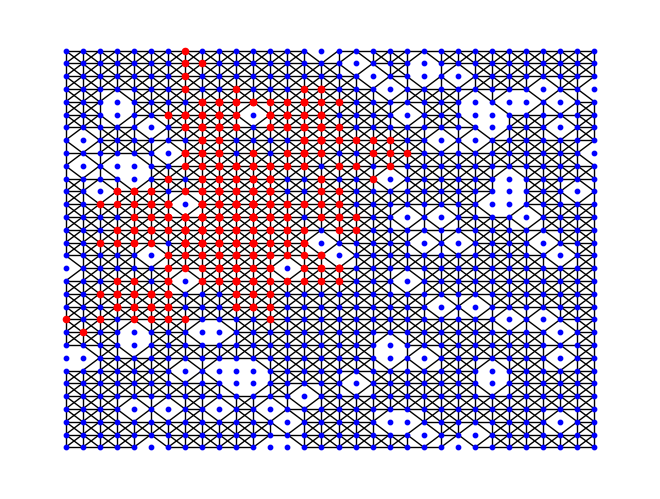

In [36]:
# Convert to SciPy sparse matrix
adj_matrix_numpy = adj_matrix.numpy()
adj_matrix_sparse = csr_matrix(adj_matrix_numpy)

# To visualize the graph, we convert it to a networkx graph and plot
G = nx.from_scipy_sparse_array(adj_matrix_sparse)
pos = {i: [(i // n) % n, i % n] for i in range(N)}
nx.draw(G, pos, node_size=10, node_color='blue')

# Highlight the tiger's track in a different color
track_indices = [x * n + y for x, y in track]
nx.draw_networkx_nodes(G, pos, nodelist=track_indices, node_color='red', node_size=20)

plt.show()

<ipython-input-37-5272c76f8b67>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, orientation='vertical', label='Sensor Score')


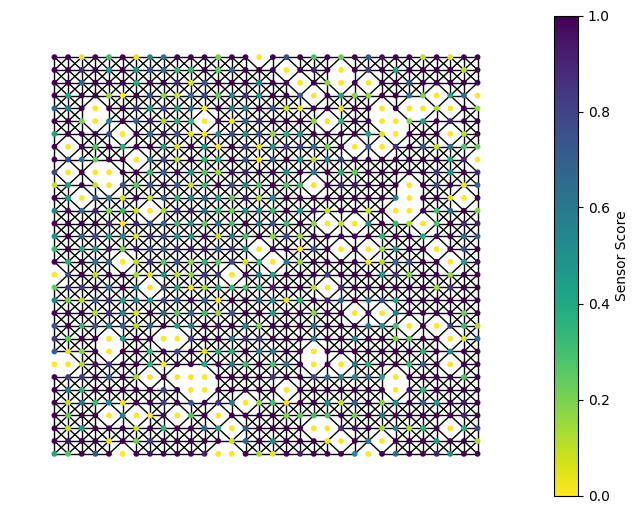

In [37]:
# To visualize the graph, we convert it to a networkx graph and plot
G = nx.from_scipy_sparse_array(adj_matrix_sparse)
pos = {i: [(i // n) % n, i % n] for i in range(N)}
node_colors = [grid[i // n, i % n].item() for i in range(N)]

# Use a colormap to map the sensor score to a color
nx.draw(G, pos, node_size=10, node_color=node_colors, cmap=plt.cm.viridis_r, vmin=0, vmax=1)

# Add a colorbar to show the mapping from sensor score to color
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis_r, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, orientation='vertical', label='Sensor Score')

plt.show()
